In [1]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load Mnist dataset
mnist = tf.keras.datasets.mnist
(images, labels), (_,_ ) = mnist.load_data()

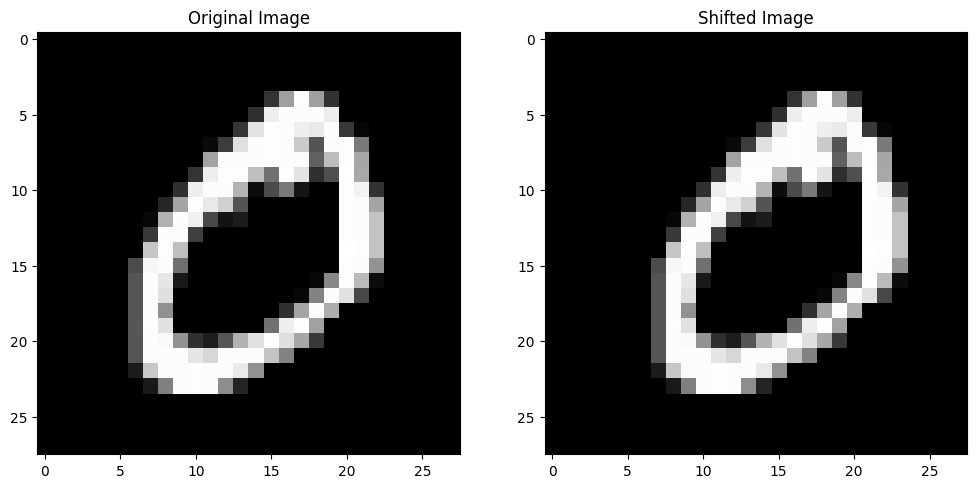

In [3]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('Shifted Image')
plt.show()


In [4]:

eVal, eVec = np.linalg.eig(zero)
eVec=eVec.T
